In [44]:
import numpy as np
from matplotlib import pyplot as  plt
from matplotlib import rc
from typing import Tuple, Mapping
from mpl_toolkits import mplot3d
import random
from sklearn.datasets import make_blobs

In [45]:
def my_plot_function(f: Mapping, title: str):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
  ax.view_init(40, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)
def my_plot_method(f: Mapping, title: str, log: list, p_x:float, p_y:float, p_z:float):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.gca(projection ='3d') 
  ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
  ax.view_init(80, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)
  ax.scatter(log[0][0], log[0][1], log[0][2], linewidths  = 5 , color='m', alpha = 1, label ='Начальная точка')
  ax.scatter(0, 0, 0, linewidths  = 10 , color='b', alpha = 0.5, label ='Глобальный минимум')
  ax.scatter(p_x, p_y, p_z, linewidths  = 4 , color='r', alpha = 1, label ='Найденный методом глобальный минимум')
  ax.legend(fontsize=12, loc='lower left')
  ax.plot3D(np.linspace(p_x, p_x, 2), np.linspace(p_y, p_y, 2), np.linspace(p_z, 20, 2), 'red')
  for i in range(0, len(log) - 1, 1):
    ax.plot3D(np.linspace(log[i][0], log[i+1][0] , 2), np.linspace(log[i][1],
    log[i+1][1], 2), np.linspace(log[i][2], log[i+1][2], 2), 'grey', alpha = 1)


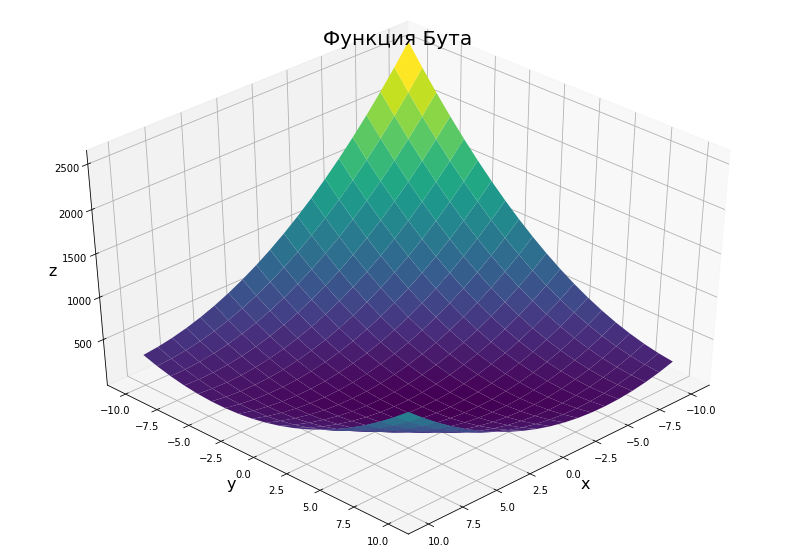

In [46]:
  def Booth(x: np.array, y:np.array) -> np.float128:
    return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5)
  def Booth_dfdx(x: np.array, y:np.array) -> np.float128:
    return 10 * x + 8 * y - 34 
  def Booth_dfdy(x: np.array, y:np.array) -> np.float128:
    return 10 * y + 8 * x - 38
  def LF_Booth_dx(F_train:np.array, x:np.array, y:np.array) -> np.float128:
    return -2 * F_train * (10 * x + 8 * y - 34) + 2 * (10 * x + 8 * y - 34)
  def LF_Booth_dy(F_train, x:np.array, y:np.array) -> np.float128:
    return -2 * F_train * (-38 - x * 8 + y * 10) + 2 * (-38 - x * 8 + y * 10)

  
  my_plot_function(Booth, 'Функция Бута')

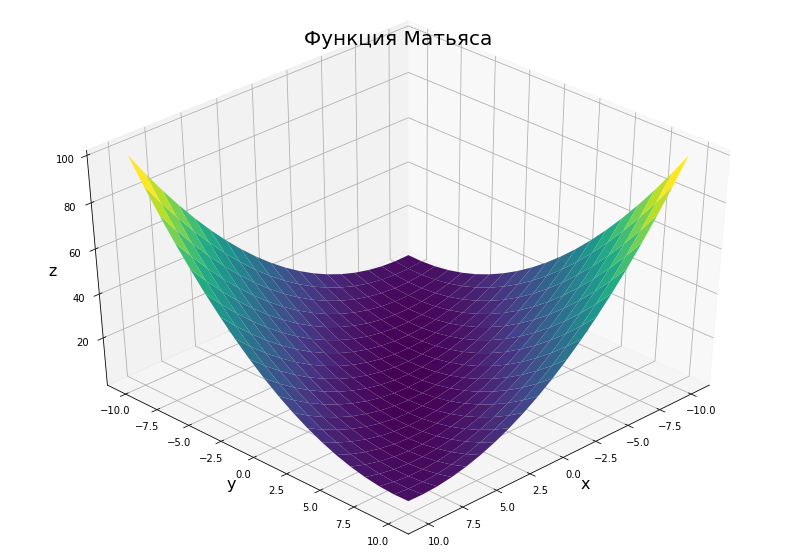

In [47]:
def Matias(x: np.array, y:np.array) -> np.float128:
  return 0.26*(x*x + y*y) - 0.48*x*y
def Matias_dfdx(x: np.array, y:np.array) -> np.float128:
  return 0.52 * x - 0.48 * y
def Matias_dfdy(x: np.array, y:np.array) -> np.float128:
  return 0.52 * y - 0.48 * x
def LF_Matias_dx(F_train:np.array, x:np.array, y:np.array) -> np.float128:
  return -2 * F_train * (0.52*x - 0.48*y) + 2 * (0.52*x - 0.48*y)
def LF_Matias_dy(F_train:np.array, x:np.array, y:np.array) -> np.float128:
  return -2 * F_train * (-0.48*x + 0.52*y) + 2 * (-0.48*x + 0.52*y)

my_plot_function(Matias, 'Функция Матьяса')

In [48]:
def my_GD(f: Mapping, dx:Mapping, dy:Mapping, log: list,
          x0: np.ndarray = [random.randint(-10, 10), random.randint(-10, 10)],
          lr: float = 0.01, T:int = 1000) -> Tuple [np.ndarray, np.float32]:
  """
  Функция принимает:
  f - функционал для оптимизации
  dx, dy - градиент оптимизируемого функционала
  log - лист, в который будут логированы шаги алгоритма для дальнейшей визуализации
  x0 - стартовая точка алгоритма
  lr - скорость обучения (default: 0.01)
  T - количество итераций (default: 1000)

  Функция возвращает:
  Кортеж, включающий в себя: координаты сгенерированной случайно начальной точки,
  координаты полученной точки глобального минимума, значение функции в найденной
  точке глобального минимума
  """
  log.append([x0[0].copy(), x0[1].copy(), f(x0[0], x0[1])])
  xt = x0[0]
  yt = x0[1]

  for i in range(T):
    xt = xt - lr * dx(xt, yt)
    yt = yt - lr * dy(xt, yt)
    log.append([xt.copy(), yt.copy(), f(xt, yt)])
  return x0[0], x0[1], xt, yt, f(xt, yt)

Градиентный спуск
Начальная точка: x0 = 10 , y0 = -10 
Точка глобального минимума: xt = -0.004229136952113594 , yt = -0.004220461571001646 
Значение функции в точке глобального минимума: f(xt, yt) = 7.139759675776723e-07


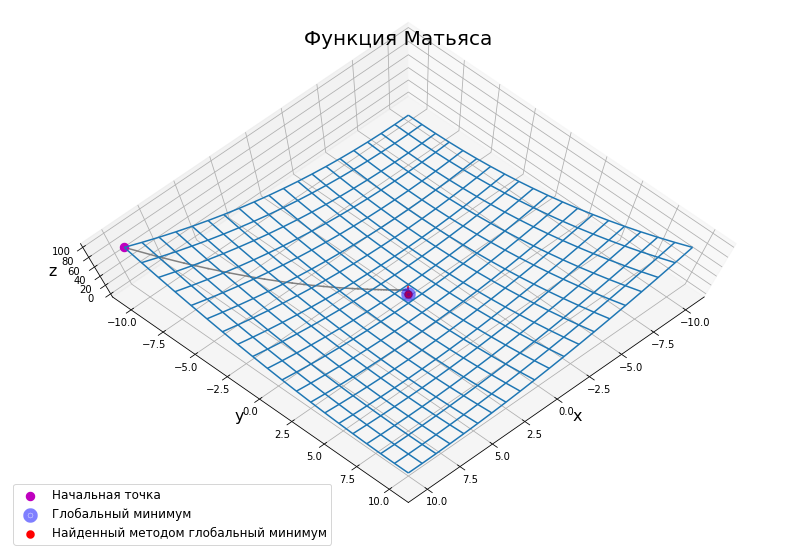

In [49]:
log_GD_Matias = list()
x0, y0, x, y, z = my_GD(Matias, Matias_dfdx, Matias_dfdy, log=log_GD_Matias, x0=np.array([10, -10]),
                        lr = 0.1)
print("Градиентный спуск\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", x, ", yt =", y,
      "\nЗначение функции в точке глобального минимума: f(xt, yt) =", z)
my_plot_method(Matias, 'Функция Матьяса', log_GD_Matias, x, y, z)

Градиентный спуск
Начальная точка: x0 = -10 , y0 = -10 
Точка глобального минимума: xt = 0.0032089325846472 , yt = 0.37473574796587106 
Значение функции в точке глобального минимума: f(xt, yt) = 60.36274377369651


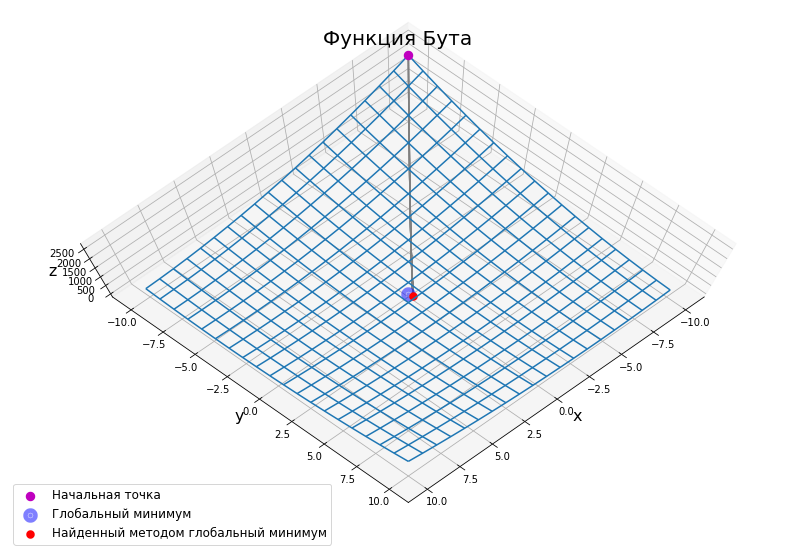

In [50]:
log_GD_Booth = list()
x0, y0, x, y, z = my_GD(Booth, Booth_dfdx, Booth_dfdy, log_GD_Booth, x0=np.array([-10, -10]),
                        lr = 0.000105)
print("Градиентный спуск\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", x, ", yt =", y,
      "\nЗначение функции в точке глобального минимума: f(xt, yt) =", z)
my_plot_method(Booth, 'Функция Бута', log_GD_Booth, x, y, z)

In [51]:
def my_GD_Momentum(f: Mapping, dx:Mapping, dy:Mapping, log: list,
        x0: np.ndarray = [random.randint(-10, 10), random.randint(-10, 10)], 
        beta: float = 0.9, T:int = 1000) -> Tuple [int, int, float, float, float]:
  """
  Функция принимает:
  f - функционал для оптимизации
  dx, dy - градиент оптимизируемого функционала
  log - лист, в который будут логированы шаги алгоритма для дальнейшей визуализации
  x0 - стартовая точка алгоритма
  beta - коэффициент обучения (default: 0.9)
  T - количество итераций (default: 1000)

  Функция возвращает:
  Кортеж, включающий в себя: координаты сгенерированной случайно начальной точки,
  координаты полученной точки глобального минимума, значение функции в найденной
  точке глобального минимума
  """
  log.append([x0[0], x0[1], f(x0[0], x0[1])])
  xt = x0[0]
  yt = x0[1]

  for i in range (T):
    xt = xt * beta - (1 - beta) * dx(xt, yt)
    yt = yt * beta - (1 - beta) * dy(xt, yt)
    log.append([xt, yt, f(xt, yt)])
  return x0[0], x0[1], xt, yt, f(xt, yt)

Алгоритм GD Momentum
Начальная точка: x0 = 10 , y0 = -10 
Точка глобального минимума: xt = -5.990194208112103e-50 , yt = -5.66182284098101e-50 
Глобальный минимум: f(xt, yt) = 1.3846519518114525e-100


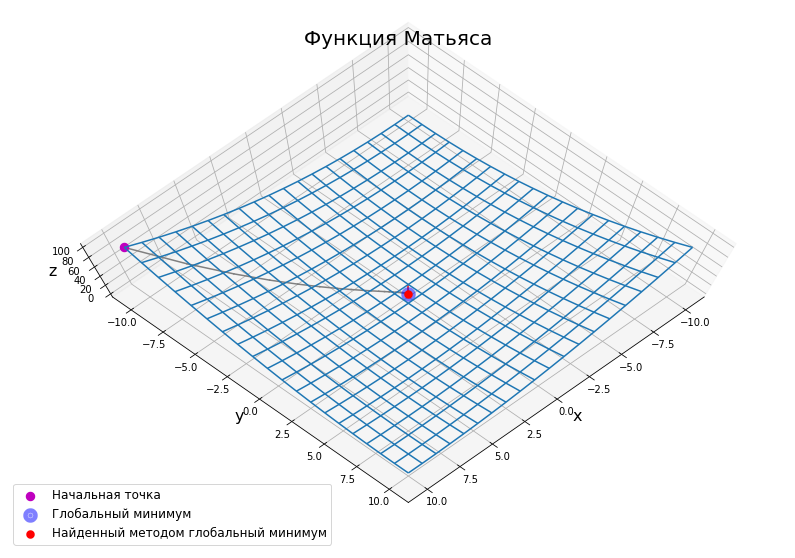

In [52]:
log_Moment_Matias = list()
x0, y0, p_x, p_y, p_z = my_GD_Momentum(Matias, Matias_dfdx, Matias_dfdy, log_Moment_Matias,
                                       x0=np.array([10, -10]))
print("Алгоритм GD Momentum\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Матьяса", log_Moment_Matias, p_x, p_y, p_z)

Алгоритм GD Momentum
Начальная точка: x0 = -10 , y0 = -10 
Точка глобального минимума: xt = 1.2280701754385968 , yt = 2.56140350877193 
Глобальный минимум: f(xt, yt) = 0.42166820560172336


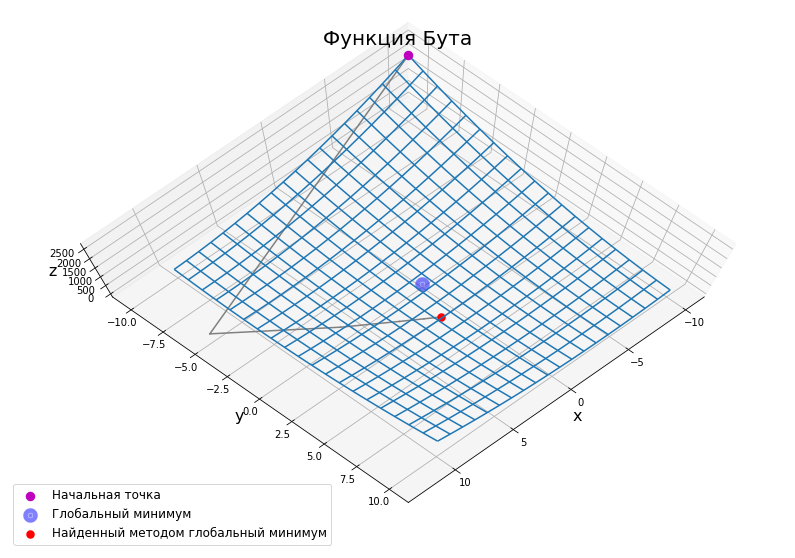

In [53]:
log_Moment_Booth = list()
x0, y0, p_x, p_y, p_z = my_GD_Momentum(Booth, Booth_dfdx, Booth_dfdy, log_Moment_Booth,
                                       np.array([-10, -10]))
print("Алгоритм GD Momentum\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Booth, "Функция Бута", log_Moment_Booth, p_x, p_y, p_z)

In [54]:
def my_GD_ADAM(f: Mapping, dx:Mapping, dy:Mapping, log: list,
        x0: np.ndarray = [random.randint(-10, 10), random.randint(-10, 10)],
        lr: float = 0.1, beta1: float = 0.9, beta2: float = 0.99,
        eps: float = 1e-8, T:int = 1000) -> Tuple [int, int, float, float, float]:
  """
  Функция принимает:
  f - функционал для оптимизации
  dx, dy - градиент оптимизируемого функционала
  log - лист, в который будут логированы шаги алгоритма для дальнейшей визуализации
  x0 - стартовая точка алгоритма

  lr - коэффициент скорости обучения (default: 0.1)
  beta1 - параметр (default: 0.9)
  beta2 - параметр (default: 0.99)
  eps - параметр (default: 1e-8)

  T - количество итераций (default: 1000)

  Функция возвращает:
  Кортеж, включающий в себя: координаты сгенерированной случайно начальной точки,
  координаты полученной точки глобального минимума, значение функции в найденной
  точке глобального минимума
  """
  log.append([x0[0], x0[1], f(x0[0], x0[1])])
  xt = x0[0]
  yt = x0[1]
  vtx = 0
  vty = 0
  Gtx = 0
  Gty = 0

  for i in range (T):
    grad_x = dx(xt, yt)
    grad_y = dy(xt, yt)
    vtx = beta1 * vtx + (1 - beta1) * grad_x
    vty = beta1 * vty + (1 - beta1) * grad_y
    Gtx = beta2 * Gtx + (1 - beta2) * (grad_x) ** 2
    Gty = beta2 * Gty + (1 - beta2) * (grad_y) ** 2
    xt = xt - lr * vtx / (Gtx + eps) ** (1 / 2)
    yt = yt - lr * vty / (Gty + eps) ** (1 / 2)
    log.append([xt, yt, f(xt, yt)])
  return x0[0], x0[1], xt, yt, f(xt, yt)

Алгоритм GD ADAM
Начальная точка: x0 = 10 , y0 = -10 
Точка глобального минимума: xt = -8.08304859034943e-22 , yt = 8.08304859034943e-22 
Глобальный минимум: f(xt, yt) = 6.533567451394991e-43


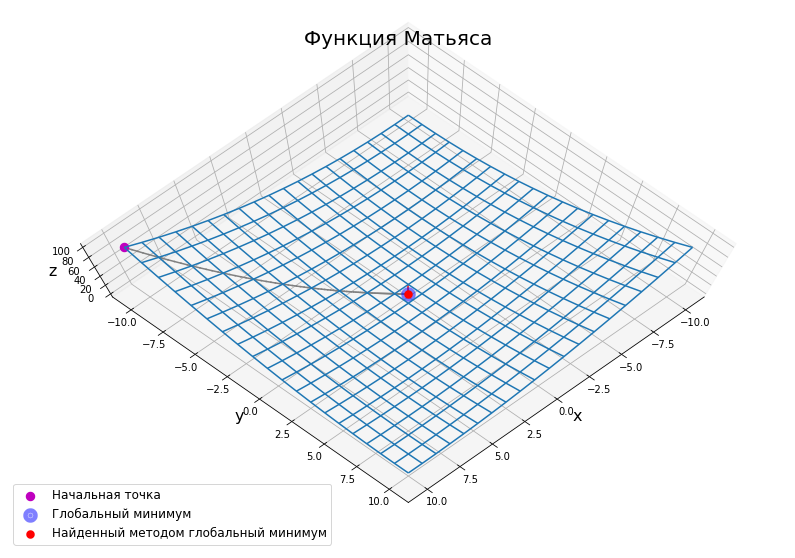

In [55]:
log_ADAM_Matias = list()
x0, y0, p_x, p_y, p_z = my_GD_ADAM(Matias, Matias_dfdx, Matias_dfdy, log_ADAM_Matias,
                                   x0=np.array([10, -10]))
print("Алгоритм GD ADAM\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Матьяса", log_ADAM_Matias, p_x, p_y, p_z)

Алгоритм GD ADAM
Начальная точка: x0 = -10 , y0 = -10 
Точка глобального минимума: xt = 1.0000000000000373 , yt = 2.9999999999999623 
Глобальный минимум: f(xt, yt) = 2.8501544505635157e-27


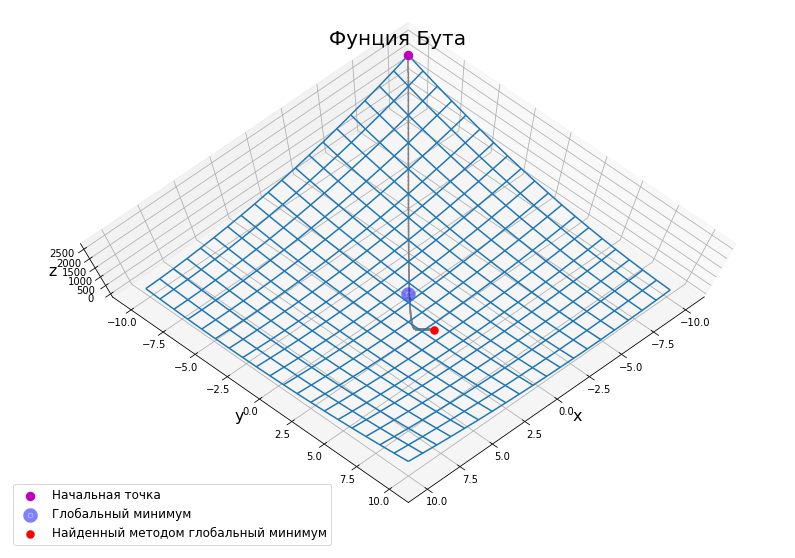

In [56]:
log_ADAM_Booth = list()
x0, y0, p_x, p_y, p_z = my_GD_ADAM(Booth, Booth_dfdx, Booth_dfdy, log_ADAM_Booth, x0=np.array([-10, -10]))
print("Алгоритм GD ADAM\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Booth, "Фунция Бута", log_ADAM_Booth, p_x, p_y, p_z)

In [57]:
log = list()
def SGD_Dataset2D(x_train: np.ndarray, y_train: np.ndarray, a: np.ndarray, b: np.ndarray,
          count_epochs:int, size_dataset:int, size_batch:int, count_batch:int,
          lr: float = 0.01) -> Tuple [np.float128, np.float128, np.float128]:
  log.append([a, b])
  for c_e in range(count_epochs):
    rd = np.arange(size_dataset)
    np.random.shuffle(rd)
    x_train, y_train = x_train[rd], y_train[rd]
    for c_b in range(count_batch - 1):
      x_batch = x_train[c_b * size_batch : (c_b + 1) * size_batch]
      y_batch = y_train[c_b * size_batch : (c_b + 1) * size_batch]
      a_grad = -2 * (y_batch - a - b * x_batch).mean()
      b_grad = -2 * (x_batch * (y_batch - a - b * x_batch)).mean()
      
      a -= lr * a_grad
      b -= lr * b_grad

      log.append([a.copy(), b.copy()])
  return (a, b)

In [58]:
_dataset, y = make_blobs(n_samples=100, centers=3, n_features=1, random_state=0) #генерация датасета
x_train = np.array(list(map(list, zip(*_dataset)))[0])
_size_dataset = _dataset.shape[0]
answer_a =  np.random.randn(1)[0]
answer_b =  np.random.randn(1)[0]
y_train = answer_b * x_train + answer_a #y = a + bx,  
y_train +=  1 * np.random.normal(scale=0.3, size=_size_dataset) #добавление шума
_count_epochs = 10000
_size_batch = 20
_count_batch = _size_dataset // _size_batch
print("y = ", answer_a, " * x + ", answer_b) #прямая, вдоль которой (+шум) генерируются точки

y =  -0.4515591624218398  * x +  -2.0738525457053685


In [59]:
log.clear()
_a, _b = SGD_Dataset2D(x_train, y_train, 0.5, 0.5, _count_epochs, _size_dataset, _size_batch, _count_batch)
print("~y = ", _a, " * x + ", _b ) #прямая, которую нашла sgd

~y =  -0.47147796258861  * x +  -2.050888448199536


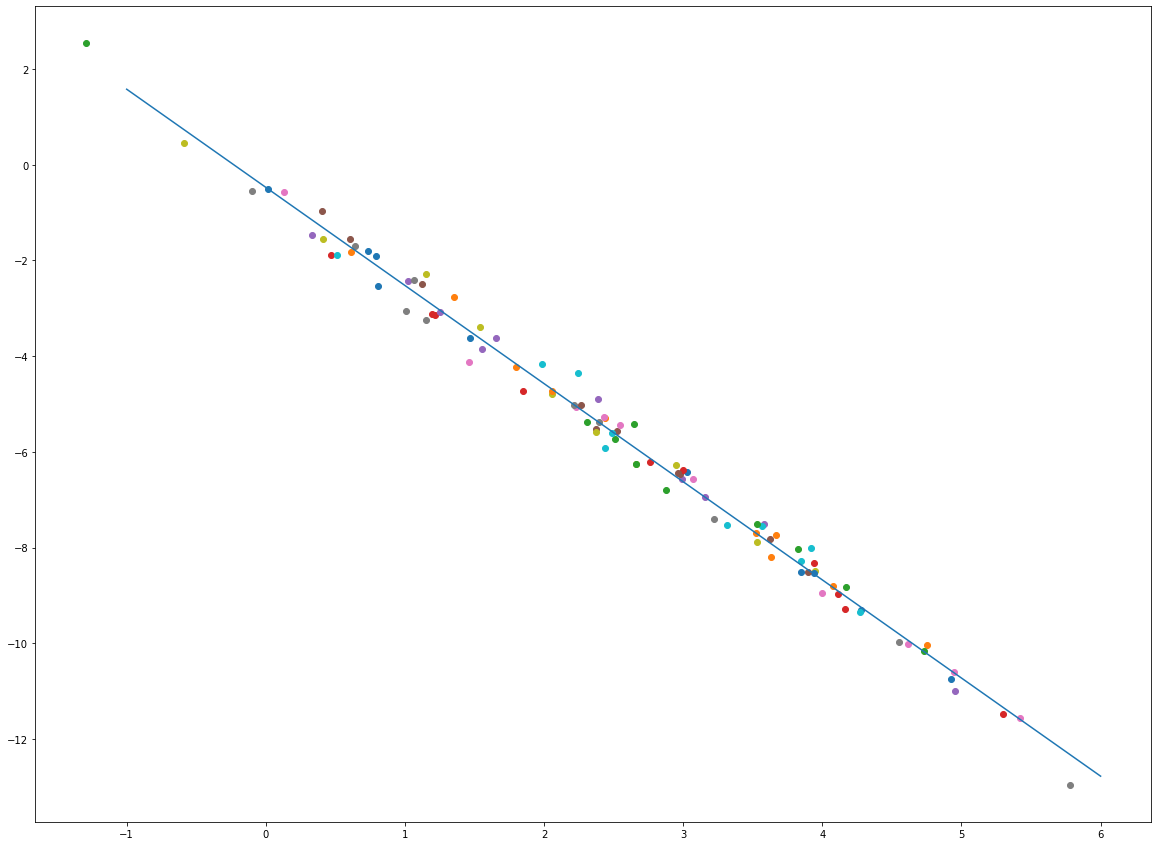

In [60]:
plt.figure(figsize=(20, 15))
x_points = np.linspace(-1, 6, 2)
plt.plot(x_points, _b * x_points + _a, label=r'$f_1(x)=\sin(x)$')
for i in range(_size_dataset):
  plt.scatter(x_train[i], y_train[i])

In [61]:
log = list()
def SGD_Dataset2D_Momentum(x_train: np.ndarray, y_train: np.ndarray, a: np.ndarray, b: np.ndarray,
          count_epochs:int, size_dataset:int, size_batch:int, count_batch:int,
          beta: float = 0.9) -> Tuple [np.float128, np.float128, np.float128]:
  log.append([a, b])
  for c_e in range(count_epochs):
    rd = np.arange(size_dataset)
    np.random.shuffle(rd)
    x_train, y_train = x_train[rd], y_train[rd]
    for c_b in range(count_batch - 1):
      x_batch = x_train[c_b * size_batch : (c_b + 1) * size_batch]
      y_batch = y_train[c_b * size_batch : (c_b + 1) * size_batch]
      a_grad = -2 * (y_batch - a - b * x_batch).mean()
      b_grad = -2 * (x_batch * (y_batch - a - b * x_batch)).mean()
      
      a = beta * a - (1 - beta) * a_grad
      b = beta * b - (1 - beta) * b_grad

      log.append([a.copy(), b.copy()])
  return (a, b)

~y =  -0.5718395542193433  * x +  -1.9932477076758677


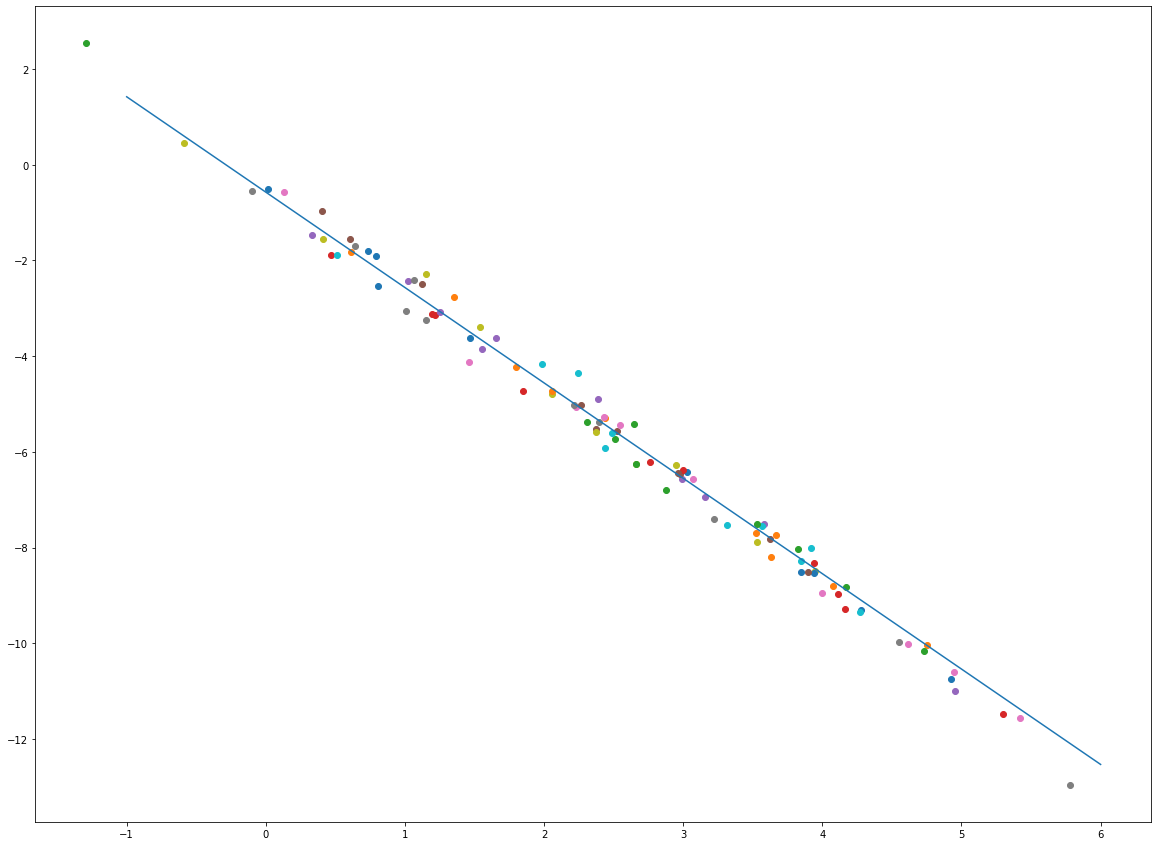

In [62]:
log.clear()
_a, _b = SGD_Dataset2D_Momentum(x_train, y_train, 0.5, 0.5, _count_epochs, _size_dataset, _size_batch, _count_batch)
print("~y = ", _a, " * x + ", _b )

plt.figure(figsize=(20, 15))
x_points = np.linspace(-1, 6, 2)
plt.plot(x_points, _b * x_points + _a, label=r'$f_1(x)=\sin(x)$')
for i in range(_size_dataset):
  plt.scatter(x_train[i], y_train[i])

In [63]:
log = list()
def SGD_Dataset2D_ADAM(x_train: np.ndarray, y_train: np.ndarray, a: np.ndarray, b: np.ndarray,
          count_epochs:int, size_dataset:int, size_batch:int, count_batch:int,
          eps: float = 1e-8, beta1: float = 0.9, beta2: float = 0.99,
          lr: float = 0.01) -> Tuple [np.float128, np.float128, np.float128]:
  log.append([a, b])
  for c_e in range(count_epochs):
    rd = np.arange(size_dataset)
    np.random.shuffle(rd)
    x_train, y_train = x_train[rd], y_train[rd]

    va = 0
    vb = 0
    Ga = 0
    Gb = 0

    for c_b in range(count_batch - 1):
      x_batch = x_train[c_b * size_batch : (c_b + 1) * size_batch]
      y_batch = y_train[c_b * size_batch : (c_b + 1) * size_batch]
      a_grad = -2 * (y_batch - a - b * x_batch).mean()
      b_grad = -2 * (x_batch * (y_batch - a - b * x_batch)).mean()
      
      va = beta1 * va + (1 - beta1) * a_grad
      vb = beta1 * vb + (1 - beta1) * b_grad
      Ga = beta2 * Ga + (1 - beta2) * a_grad ** 2
      Gb = beta2 * Gb + (1 - beta2) * b_grad ** 2

      a = a - lr * va / (Ga + eps) ** (1 / 2)
      b = b - lr * vb / (Gb + eps) ** (1 / 2)

      log.append([a.copy(), b.copy()])
  return (a, b)

~y =  -0.4133574438911714  * x +  -2.0607956308275392


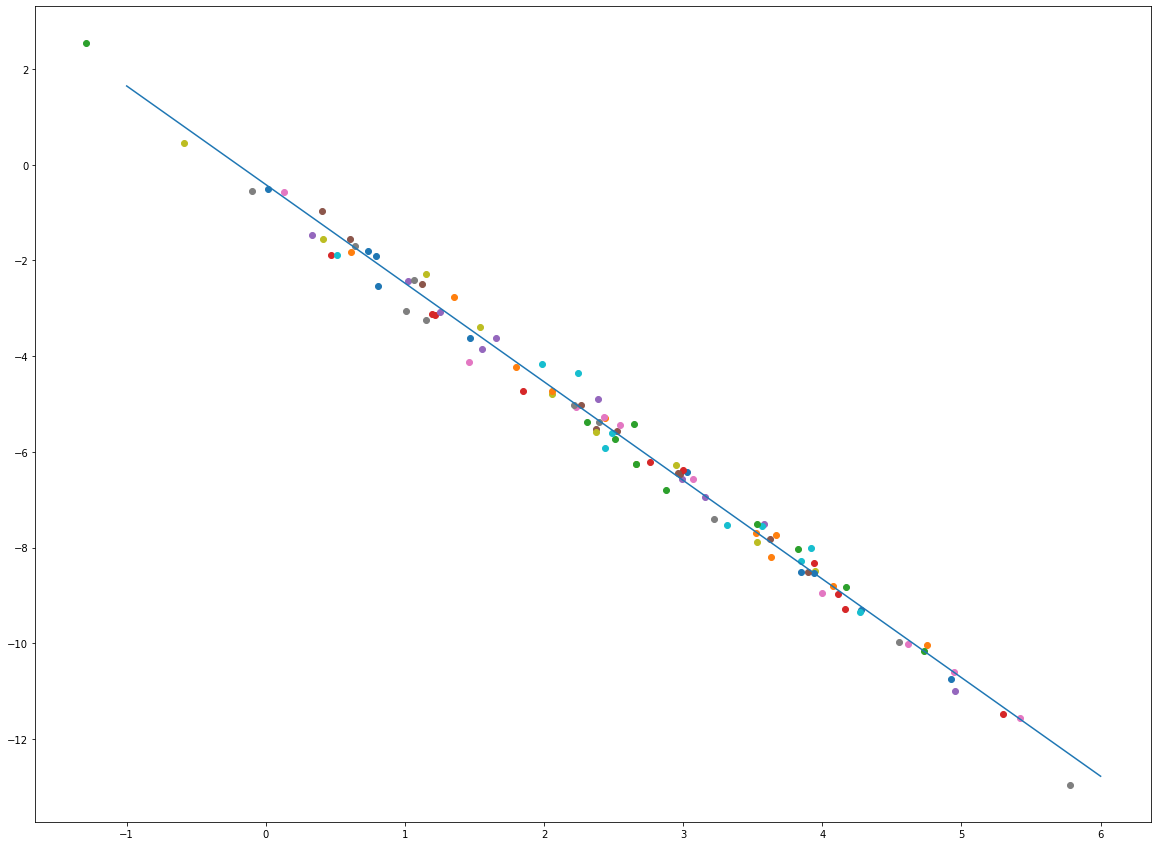

In [64]:
log.clear()
_a, _b = SGD_Dataset2D_ADAM(x_train, y_train, 0.5, 0.5, _count_epochs, _size_dataset, _size_batch, _count_batch)
print("~y = ", _a, " * x + ", _b )

plt.figure(figsize=(20, 15))
x_points = np.linspace(-1, 6, 2)
plt.plot(x_points, _b * x_points + _a, label=r'$f_1(x)=\sin(x)$')
for i in range(_size_dataset):
  plt.scatter(x_train[i], y_train[i])